In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


In [2]:
df = pd.read_csv('./mstat.csv.gz', compression='gzip').dropna()
df['time'] = pd.to_datetime(df.time.str.replace('D', ' '))

In [8]:
df

,date,sym,time,exchangetime,open,high,low,close,firstBid,firstAsk,...,closeAsk,prevBid,prevAsk,variance,priceimpact1,priceimpact2,DpprevDp,rtvol,regular_hours,cluster
1,2024-08-05,ESU4,2024-08-04 22:01:00,-06:59,533050.0,533250.0,532275.0,532625.0,533050.0,533075.0,...,532625.0,533125.0,533200.0,517656.25,-17.761605,-16.129827,-148125.0,293.127024,0,2
2,2024-08-05,ESU4,2024-08-04 22:02:00,-06:58,532650.0,532925.0,532200.0,532450.0,532600.0,532650.0,...,532475.0,532575.0,532625.0,340312.50,-0.475842,-7.086431,-116875.0,331.870008,0,0
3,2024-08-05,ESU4,2024-08-04 22:03:00,-06:57,532475.0,532675.0,532125.0,532375.0,532425.0,532475.0,...,532400.0,532425.0,532475.0,183437.50,-20.449561,-78.265086,-31875.0,342.378690,0,0
4,2024-08-05,ESU4,2024-08-04 22:04:00,-06:56,532400.0,532750.0,532225.0,532700.0,532350.0,532400.0,...,532725.0,532350.0,532400.0,120625.00,4.924953,25.644468,-13750.0,342.882314,0,0
5,2024-08-05,ESU4,2024-08-04 22:05:00,-06:55,532725.0,533100.0,532550.0,532875.0,532700.0,532725.0,...,532925.0,532675.0,532725.0,90312.50,14.109195,0.451647,-18750.0,338.942311,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27595,2024-08-30,ESU4,2024-08-30 20:55:00,15:55,565675.0,565675.0,565600.0,565675.0,565650.0,565675.0,...,565675.0,565650.0,565675.0,2500.00,6.730769,0.672372,-1875.0,51.856965,0,0
27596,2024-08-30,ESU4,2024-08-30 20:56:00,15:56,565650.0,565750.0,565625.0,565750.0,565650.0,565675.0,...,565750.0,565650.0,565675.0,3750.00,13.750000,10.907643,-5000.0,52.853778,0,0
27597,2024-08-30,ESU4,2024-08-30 20:57:00,15:57,565750.0,565800.0,565700.0,565700.0,565725.0,565750.0,...,565725.0,565725.0,565750.0,4375.00,29.385965,50.661765,-3125.0,54.276736,0,0
27598,2024-08-30,ESU4,2024-08-30 20:58:00,15:58,565725.0,565725.0,565575.0,565575.0,565700.0,565725.0,...,565600.0,565700.0,565725.0,10000.00,2.500000,25.759549,-6250.0,59.950790,0,0


In [3]:
df['regular_hours'] = df['time'].apply(lambda x: 1 if x.time() >= pd.to_datetime("08:30").time() and x.time() <= pd.to_datetime("15:15").time() else 0)

In [4]:
df.dtypes

date                     object
sym                      object
time             datetime64[ns]
exchangetime             object
open                    float64
high                    float64
low                     float64
close                   float64
firstBid                float64
firstAsk                float64
lastBid                 float64
lastAsk                 float64
volume                    int64
numTrades                 int64
avgSize                 float64
vwap                    float64
aggBuyVol                 int64
aggSellVol                int64
depth                   float64
numRndLots                int64
numContPx                 int64
numAltPx                  int64
avgMid                  float64
avgQuotesize            float64
numQuotes                 int64
avgSpread               float64
openBid                 float64
openAsk                 float64
highBid                 float64
highAsk                 float64
lowBid                  float64
lowAsk  

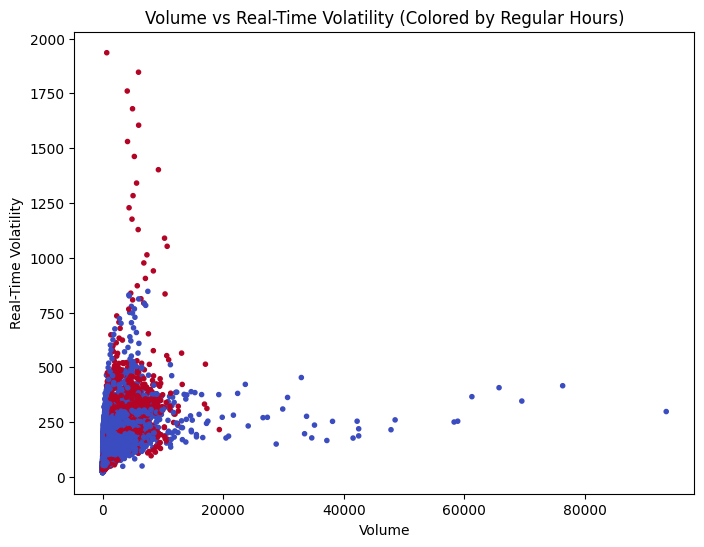

In [5]:
# Scatter plot of 'volume' vs 'rtvol', colored by 'regular_hours'
plt.figure(figsize=(8, 6))
plt.scatter(df['volume'], df['rtvol'], marker='.', c=df['regular_hours'], cmap='coolwarm')
plt.title("Volume vs Real-Time Volatility (Colored by Regular Hours)")
plt.xlabel("Volume")
plt.ylabel("Real-Time Volatility")
plt.show()

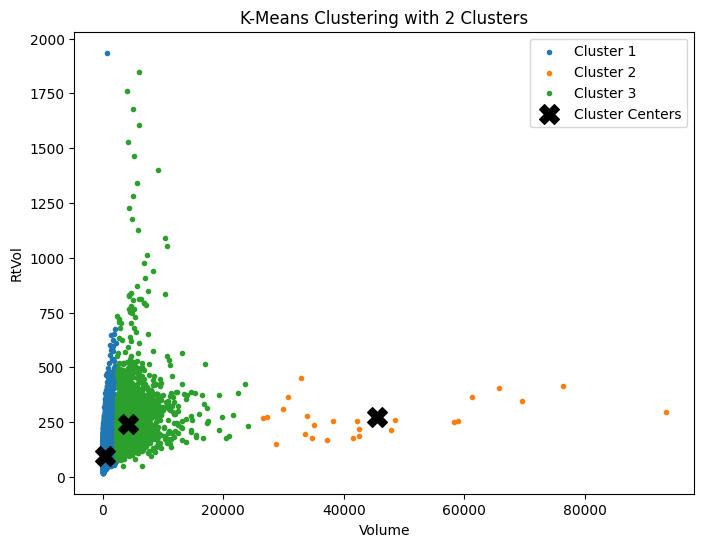

In [6]:
cluster_n = 3
kmeans = KMeans(n_clusters=cluster_n, random_state=0).fit(df[['volume', 'rtvol']])

# Return cluster centers
cluster_centers = kmeans.cluster_centers_
df['cluster'] = kmeans.labels_

# Plotting the data points with different colors for each cluster
plt.figure(figsize=(8, 6))
for cluster in range(cluster_n):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['volume'], cluster_data['rtvol'],marker='.', label=f'Cluster {cluster + 1}')

# Plot the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],s=200, color='black', marker='X', label='Cluster Centers')

# Adding plot details
plt.xlabel('Volume')
plt.ylabel('RtVol')
plt.title('K-Means Clustering with 2 Clusters')
plt.legend()
plt.show()

In [7]:
# Apply t-SNE to reduce to 2D
tsne = TSNE(n_components=2, random_state=0)
df_tsne = tsne.fit_transform(df[['volume', 'rtvol']])

# Plotting the 2D t-SNE results with clusters
plt.figure(figsize=(8, 6))
for cluster in range(cluster_n):
    cluster_data = df_tsne[df['cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster + 1}', marker='.')

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('K-Means Clustering in 2D (t-SNE)')
plt.legend()
plt.show()


KeyboardInterrupt: 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


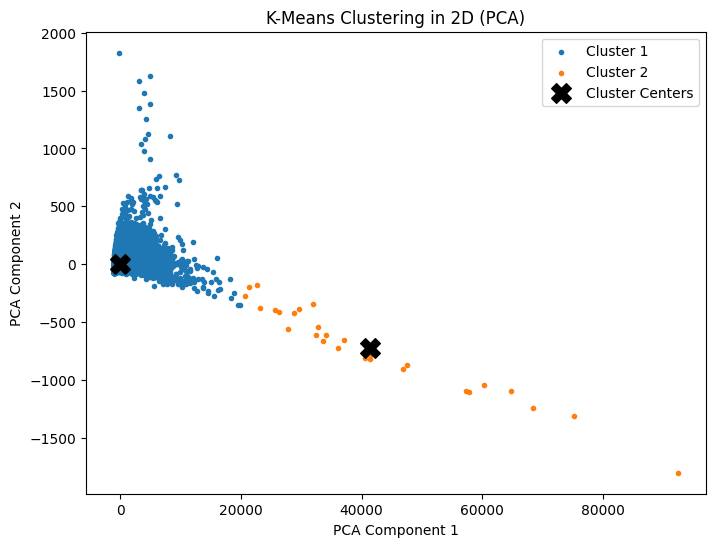

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the number of clusters
cluster_n = 2
kmeans = KMeans(n_clusters=cluster_n, random_state=0).fit(df[['volume', 'rtvol', 'avgSize']])
df['cluster'] = kmeans.labels_

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[['volume', 'rtvol', 'avgSize']])

# Plotting the 2D PCA results with clusters
plt.figure(figsize=(8, 6))
for cluster in range(cluster_n):
    cluster_data = df_pca[df['cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster + 1}', marker='.')

# Plot the cluster centers (also projected to 2D with PCA)
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], s=200, color='black', marker='X', label='Cluster Centers')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering in 2D (PCA)')
plt.legend()
plt.show()
